In [1]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy = True

# pyEPR analysis of straddling regime sample for pair-coherent state experiment


Author: Akshay Koottandavida

## <div style="background:#BBFABB;line-height:2em;">Project = straddling_regime_transmon <br> Design = 3. straddling_squid<div>

In [1]:
import pyEPR as epr
from pathlib import Path
import logging
epr.logger.setLevel(logging.DEBUG)
%matplotlib inline

print('Parsing unis:  2um =', 
      epr.parse_entry('2um', 'meters'), 'meters')

print(f"""For   L_J = 8.5nH, the Josephson junction energy is
      E_J = {epr.calcs.Convert.Ej_from_Lj(8.5, 'nH', 'GHz'):.1f} GHz""")

Parsing unis:  2um = 2e-06 meters
For   L_J = 8.5nH, the Josephson junction energy is
      E_J = 19.2 GHz


In [7]:
path_to_project = r'Z:\akshay_koottandavida\3. Pair-Coherent States\HFSS\pcs_straddling_regime'
pinfo = epr.ProjectInfo(project_path = path_to_project, 
                         project_name = 'straddling_regime_transmon',
                         design_name  = '3. straddling_squid')

INFO 06:43PM [connect]: Connecting to Ansys Desktop API...
INFO 06:43PM [load_ansys_project]: 	File path to HFSS project found.
INFO 06:43PM [load_ansys_project]: 	Opened Ansys App
INFO 06:43PM [load_ansys_project]: 	Opened Ansys Desktop v2016.0.0
INFO 06:43PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    Z:/akshay_koottandavida/3. Pair-Coherent States/HFSS/pcs_straddling_regime/
	Project:   straddling_regime_transmon


Z:\akshay_koottandavida\3. Pair-Coherent States\HFSS\pcs_straddling_regime
straddling_regime_transmon


INFO 06:43PM [connect]: 	Opened active design
	Design:    3. straddling_squid [Solution type: Eigenmode]
INFO 06:43PM [get_setup]: 	Opened setup `Modes`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 06:43PM [connect]: 	Connection to Ansys established successfully. 😀 



### Design details : Solution Type, object names, Analysis setup names, mesh statistic and convergence

In [18]:
print("\n Solution type : ",pinfo.design.solution_type)
#print(pinfo.get_all_object_names())
print("\n Analysis names : ",pinfo.design.get_setup_names())
print("\n No. of modes solved for : ",pinfo.setup.n_modes)
print("\n Mesh statistics & Convergence :")
pinfo.setup.get_mesh_stats()


 Solution type :  Eigenmode

 Analysis names :  ('Modes',)

 No. of modes solved for :  3

 Mesh statistics & Convergence :


,Unnamed: 0,Num Tets,Min edge length,Max edge length,RMS edge length,Min tet vol,Max tet vol,Mean tet vol,Std Devn (vol)
0,ES_chip,6558,0.000155,0.179676,0.012979,2.158610e-13,0.000040,2.032640e-07,0.000002
1,magnet_seat,16344,0.000167,0.183580,0.061235,2.515010e-13,0.000382,1.255140e-05,0.000030
2,magnet_core,320,0.047283,0.200000,0.127065,1.659050e-06,0.000096,3.415000e-05,0.000025


## Define josephson junctions

In [20]:
pinfo.junctions['j1'] = {'Lj_variable' : 'LJ_es', 
                         'rect'        : 'es_junction', 
                         'line'        : 'Polyline1', 
                         'length'      : epr.parse_units('200um')}

# Check that valid names of variables and objects have been supplied.
# An error is raised with a message if something is wrong.
pinfo.validate_junction_info()  

## <div style="background:#BBFABB;line-height:2em;">Microwave Analysis: <br>Run analysis on an eigenmode solution  <div>

In [27]:
eprh = epr.DistributedAnalysis(pinfo)
# eprh.get_ansys_variables()            # Prints all the variables in the design
eprh.get_ansys_frequencies_all()
# eprh.hfss_report_full_convergence();  # Shows convergence report

Design "3. straddling_squid" info:
	# eigenmodes    3
	# variations    1


Freq. (GHz)  Quality Factor
variation mode                             
0         0        6.113303    2.414583e+14
          1        6.320540    5.304169e+13
          2        6.825098    2.716447e+11

#### Run full analysis

In [29]:
eprh.do_EPR_analysis();


Variation 0  [1/1]

  Mode 0 at 6.11 GHz   [1/3]
    Calculating ℰ_magnetic,ℰ_electric


DEBUG 06:57PM [calc_p_junction]: Calculating participations for ('j1', {'Lj_variable': 'LJ_es', 'rect': 'es_junction', 'line': 'Polyline1', 'length': 0.00019999999999999998})


       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.3%          1    0.9967

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.56%
	j1              0.00014548  (+)        3.6356e-06
		(U_tot_cap-U_tot_ind)/mean=0.16%

  Mode 1 at 6.32 GHz   [2/3]
    Calculating ℰ_magnetic,ℰ_electric


DEBUG 06:57PM [calc_p_junction]: Calculating participations for ('j1', {'Lj_variable': 'LJ_es', 'rect': 'es_junction', 'line': 'Polyline1', 'length': 0.00019999999999999998})


       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.4%          1     0.996

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_1j   sign s_1j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.40%
	j1              0.000222374  (+)        5.94039e-06
		(U_tot_cap-U_tot_ind)/mean=0.20%

  Mode 2 at 6.83 GHz   [3/3]
    Calculating ℰ_magnetic,ℰ_electric


DEBUG 06:57PM [calc_p_junction]: Calculating participations for ('j1', {'Lj_variable': 'LJ_es', 'rect': 'es_junction', 'line': 'Polyline1', 'length': 0.00019999999999999998})


       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               97.2%      1.947   0.05429

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_2j   sign s_2j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 96.98%
	j1              0.970042  (+)        0.0302155
		(U_tot_cap-U_tot_ind)/mean=1.59%

ANALYSIS DONE. Data saved to:

Z:\akshay_koottandavida\Code\pyEPR\data-pyEPR\straddling_regime_transmon\3. straddling_squid\2020-03-02 18-56-19.npz




## <div style="background:#BBFABB;line-height:2em;"> Quantum Hamiltonian Analysis: <div>

WARNING 06:59PM [__init__]: <p>Error: <class 'IndexError'></p>
DEBUG 06:59PM [get_epr_base_matrices]: PJ=
DEBUG 06:59PM [get_epr_base_matrices]: [[1.45479063e-04]
 [2.22373125e-04]
 [9.72499020e-01]]
DEBUG 06:59PM [get_epr_base_matrices]: SJ=
DEBUG 06:59PM [get_epr_base_matrices]: [[1]
 [1]
 [1]]
DEBUG 06:59PM [get_epr_base_matrices]: Om=
DEBUG 06:59PM [get_epr_base_matrices]: [[6.11330274 0.         0.        ]
 [0.         6.32054005 0.        ]
 [0.         0.         6.82509753]]
DEBUG 06:59PM [get_epr_base_matrices]: EJ=
DEBUG 06:59PM [get_epr_base_matrices]: [[19.30115867]]


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    12.144636
1     9.835731
2     1.032825
dtype: float64

Pm_norm idx =
      j1
0  False
1  False
2   True
*** P (participation matrix, not normlz.)
         j1
0  0.000145
1  0.000222
2  0.941592

*** S (sign-bit matrix)
   s_j1
0     1
1     1
2     1
*** P (participation matrix, normalized.)
   0.00015
   0.00022
      0.97

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
  5.12e-06 1.62e-05   0.0765
  1.62e-05 1.28e-05    0.121
    0.0765    0.121      285

*** Chi matrix ND (MHz) 
  8.21e-05 0.000661     1.09
  0.000661 0.000941    -1.47
      1.09    -1.47      318

*** Frequencies O1 PT (MHz)
0    6113.264498
1    6320.479610
2    6539.685130
dtype: float64

*** Frequencies ND (MHz)
0    6113.233794
1    6320.385377
2    6526.732866
dtype: floa

C:\Users\Akshay\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1001: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


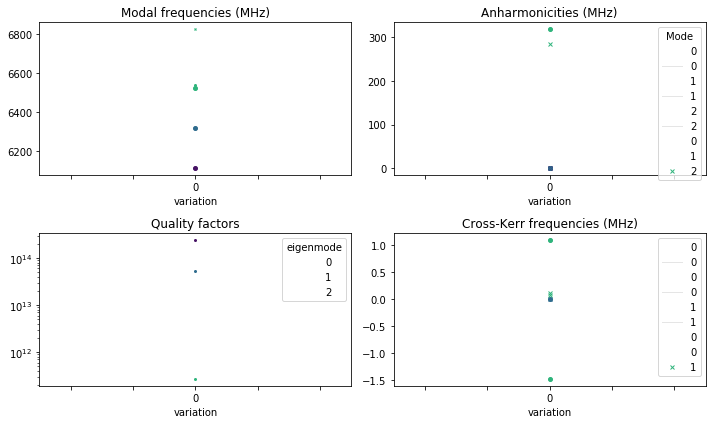

In [34]:
# Load saved solutions from above
epra = epr.QuantumAnalysis(eprh.data_filename)

# Analyze 
epra.analyze_all_variations(cos_trunc = 8, fock_trunc = 15)
epra.plot_hamiltonian_results();

In [75]:
# for ND frequencies,set numeric=False.This is a mistake in the code.Everywehre else,set numeric=True
epra.get_frequencies(numeric=False) 

variation,0
eigenmode,
0,6113.233794
1,6320.385377
2,6526.732866


In [76]:
epra.get_chis()

0         1           2
variation                                  
0         0  0.000082  0.000661    1.093826
          1  0.000661  0.000941   -1.473753
          2  1.093826 -1.473753  318.443844

In [72]:
w_ef = epra.get_frequencies(numeric=False)['0'][2]-epra.get_chis()[2][2]
w_ef

6208.289022313594